# Sales Analysis

### This analysis is used to solve the following questions below...
##### Question 1: What was the best month for sales? How much was earned that month?
##### Question 2: What City has the highest number of sales?
##### Question 3: What time should we display advertisements to maximize likelihood of customers’s buying product?
##### Question 4: What product are often sold together?
##### Question 5: What product sold the most? Why do you think it sold the most?




#### Import necessary Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import re


 #### Merging 12 months of sales data into a single file

In [91]:
files=[file for file in os.listdir('/Users/macbookpro/Downloads/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data')]
all_months_data=pd.DataFrame()
for file in files:
    df=pd.read_csv("/Users/macbookpro/Downloads/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/"+file)
    all_months_data=pd.concat([all_months_data,df])
    
all_months_data.to_csv('all_data.csv',index=False)

#### Read in updated dataframe

In [92]:
all_data=pd.read_csv('all_data.csv')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


## Clean Up The Data

#### Drop rows of NAN

In [93]:
nan_df=all_data[all_data.isna().any(axis=1)]    #This will filter all the nan rows out.
nan_df.head()

all_data=all_data.dropna(how='all')     #This will delete all nan values from the Dataframe.
all_data.head(1000)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"
...,...,...,...,...,...,...
998,296616,AAA Batteries (4-pack),1,2.99,12/09/19 21:47,"543 Hill St, Seattle, WA 98101"
999,296617,ThinkPad Laptop,1,999.99,12/26/19 21:32,"248 Washington St, San Francisco, CA 94016"
1000,296618,Wired Headphones,1,11.99,12/29/19 15:13,"678 Hickory St, New York City, NY 10001"
1001,296619,27in 4K Gaming Monitor,1,389.99,12/11/19 12:46,"543 4th St, Dallas, TX 75001"


#### Find 'Or' and Delete

In [94]:
all_data=all_data[all_data['Order Date'].str[0:2]!='Or']
all_data.head(1000)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"
...,...,...,...,...,...,...
1000,296618,Wired Headphones,1,11.99,12/29/19 15:13,"678 Hickory St, New York City, NY 10001"
1001,296619,27in 4K Gaming Monitor,1,389.99,12/11/19 12:46,"543 4th St, Dallas, TX 75001"
1002,296620,iPhone,1,700,12/23/19 19:02,"139 Cedar St, Seattle, WA 98101"
1003,296621,AAA Batteries (4-pack),1,2.99,12/16/19 10:39,"412 Sunset St, Seattle, WA 98101"


#### Convert Column to the correct Data type

In [39]:
all_data['Quantity Ordered']=pd.to_numeric(all_data['Quantity Ordered'])     # Make integer
all_data['Price Each']=pd.to_numeric(all_data['Price Each'])                 # Make Float

## Question 1: What was the best month for sales? How much was earned that month?

#### Add Month Column to all_data.csv

In [40]:
all_data['Month']=all_data['Order Date'].str[0:2]
all_data.head(50)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12
5,295670,AA Batteries (4-pack),1,3.84,12/31/19 22:58,"200 Jefferson St, New York City, NY 10001",12
6,295671,USB-C Charging Cable,1,11.95,12/16/19 15:10,"928 12th St, Portland, OR 97035",12
7,295672,USB-C Charging Cable,2,11.95,12/13/19 09:29,"813 Hickory St, Dallas, TX 75001",12
8,295673,Bose SoundSport Headphones,1,99.99,12/15/19 23:26,"718 Wilson St, Dallas, TX 75001",12
9,295674,AAA Batteries (4-pack),4,2.99,12/28/19 11:51,"77 7th St, Dallas, TX 75001",12


#### Converting the Month data type from string to integer

In [41]:
all_data['Month']=all_data['Month'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12


#### Add a Sales Column

In [42]:
all_data['Sales']=all_data['Price Each']*all_data['Quantity Ordered']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95


#### Total Sales Per Month

In [43]:
all_Total=all_data.groupby('Month').sum()
total_sales_per_month=all_Total[['Quantity Ordered', 'Price Each', 'Sales']].copy()
total_sales_per_month.head(20)

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1811768.38,1822256.73
2,13449,2188884.72,2202022.42
3,17005,2791207.83,2807100.38
4,20558,3367671.02,3390670.24
5,18667,3135125.13,3152606.75
6,15253,2562025.61,2577802.26
7,16072,2632539.56,2647775.76
8,13448,2230345.42,2244467.88
9,13109,2084992.09,2097560.13


#### Plotting a Bar Chart to Visualize the Total Sales Per Month

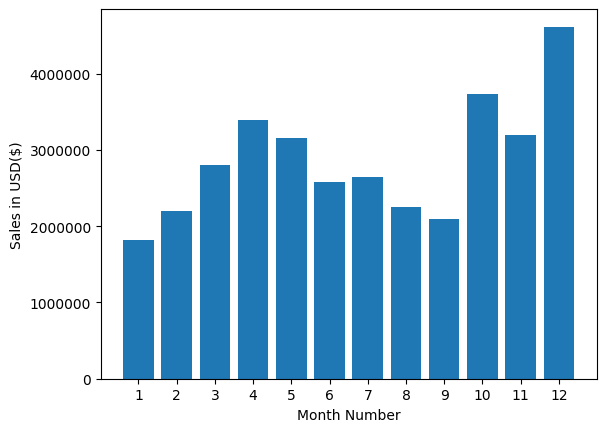

In [44]:
Month=range(1,13)
plt.bar(Month,total_sales_per_month['Sales'])
plt.ticklabel_format(style='plain')    # to prevent scientific notation.
plt.xticks(Month)
plt.ylabel('Sales in USD($)')
plt.xlabel('Month Number')
plt.show()

 ## Answer to Question 1

### The best month for sales was December, having the highest sale of $461,313. From the analysis above, it is obvious that the
### Christmas Season being the biggest festive period in USA, influenced the high sales made in December.

# Question 2: What City has the highest number of sales?

In [45]:
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95
...,...,...,...,...,...,...,...,...
186845,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215",6,2.99
186846,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001",6,149.99
186847,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016",6,11.95
186848,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016",6,11.95


#### Creating a Column for City

In [46]:
#all_data['City']=all_data['Purchase Address'].str.split(',').str[1] + ' ('+all_data['Purchase Address'].str.split(',').str[2].str[0:3]+')'
#all_data['City']=all_data['Purchase Address'].str.split(',').str[1]
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]
all_data['City']=all_data['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})")

all_data.head(500)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00,New York City (NY)
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00,New York City (NY)
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95,New York City (NY)
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco (CA)
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta (GA)
...,...,...,...,...,...,...,...,...,...
497,296137,Wired Headphones,1,11.99,12/23/19 13:31,"502 Forest St, Dallas, TX 75001",12,11.99,Dallas (TX)
498,296138,34in Ultrawide Monitor,1,379.99,12/19/19 13:19,"235 Adams St, San Francisco, CA 94016",12,379.99,San Francisco (CA)
499,296139,Bose SoundSport Headphones,1,99.99,12/29/19 02:40,"440 Elm St, New York City, NY 10001",12,99.99,New York City (NY)
500,296140,Macbook Pro Laptop,1,1700.00,12/21/19 17:48,"678 Wilson St, Los Angeles, CA 90001",12,1700.00,Los Angeles (CA)


#### Total Sales Made by City

In [47]:
all_Total_per_City=all_data.groupby('City').sum()
total_sales_per_city=all_Total_per_City[['Quantity Ordered', 'Price Each', 'Sales']].copy()
total_sales_per_city.head(50)

,Quantity Ordered,Price Each,Sales
City,,,
Atlanta (GA),16602,2779908.20,2795498.58
Austin (TX),11153,1809873.61,1819581.75
Boston (MA),22528,3637409.77,3661642.01
Dallas (TX),16730,2752627.82,2767975.40
Los Angeles (CA),33289,5421435.23,5452570.80
New York City (NY),27932,4635370.83,4664317.43
Portland (ME),2750,447189.25,449758.27
Portland (OR),11303,1860558.22,1870732.34
San Francisco (CA),50239,8211461.74,8262203.91


#### Plotting a bar chart to visualize the total sales made by each city

##### Creating a Column for City Abbreviation to aid Data Visualization

In [48]:
#cities=[a for a, df in all_data.groupby('City')]
#print(cities)
cities=sorted(all_data['City'].unique())
print(cities)
city_Abr=[]
for city in cities:
    abr=city[1:4]
    city_Abr.append(abr)
print(city_Abr)

total_sales_per_city['City Abbr']=city_Abr
total_sales_per_city.head(10)


[' Atlanta (GA)', ' Austin (TX)', ' Boston (MA)', ' Dallas (TX)', ' Los Angeles (CA)', ' New York City (NY)', ' Portland (ME)', ' Portland (OR)', ' San Francisco (CA)', ' Seattle (WA)']
['Atl', 'Aus', 'Bos', 'Dal', 'Los', 'New', 'Por', 'Por', 'San', 'Sea']


,Quantity Ordered,Price Each,Sales,City Abbr
City,,,,
Atlanta (GA),16602,2779908.20,2795498.58,Atl
Austin (TX),11153,1809873.61,1819581.75,Aus
Boston (MA),22528,3637409.77,3661642.01,Bos
Dallas (TX),16730,2752627.82,2767975.40,Dal
Los Angeles (CA),33289,5421435.23,5452570.80,Los
New York City (NY),27932,4635370.83,4664317.43,New
Portland (ME),2750,447189.25,449758.27,Por
Portland (OR),11303,1860558.22,1870732.34,Por
San Francisco (CA),50239,8211461.74,8262203.91,San


##### Bar Chart

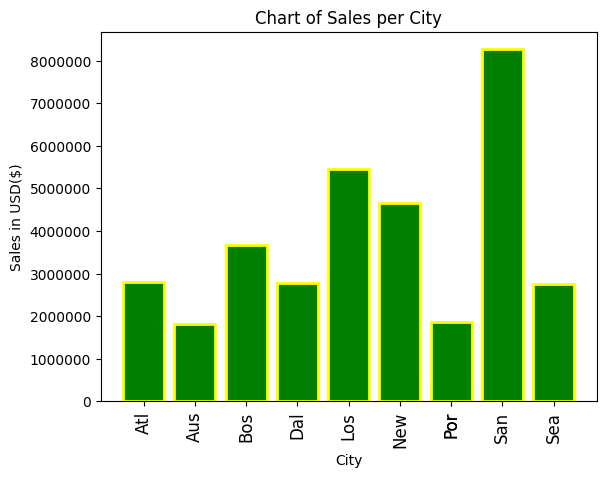

In [49]:
plt.bar(total_sales_per_city['City Abbr'],total_sales_per_city['Sales'],color=['green'],edgecolor='yellow',linewidth=2)
plt.ticklabel_format(style='plain',axis='y')    # to prevent scientific notation.
plt.xticks(city_Abr,rotation='vertical',size=12)
plt.ylabel('Sales in USD($)')
plt.xlabel('City')
plt.title('Chart of Sales per City')


plt.show()

## Answer to Question 2

### From the the Chart above, San (San Francisco) city has the highest number of Sales with a Total sale of $8,211,461


# Question 3: What time should we display advertisements to maximize likelihood of customers's buying product?

#### Converting the Order Date Format to Datetime format, so we can easily access every variation of the ordered date.

In [50]:
all_data['Order Date']=pd.to_datetime(all_data['Order Date'])
all_data

/var/folders/j1/bmzj2g4s71lfnlwmq7rt69th0000gp/T/ipykernel_9874/1238186115.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  all_data['Order Date']=pd.to_datetime(all_data['Order Date'])


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City (NY)
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City (NY)
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City (NY)
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco (CA)
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta (GA)
...,...,...,...,...,...,...,...,...,...
186845,222905,AAA Batteries (4-pack),1,2.99,2019-06-07 19:02:00,"795 Pine St, Boston, MA 02215",6,2.99,Boston (MA)
186846,222906,27in FHD Monitor,1,149.99,2019-06-01 19:29:00,"495 North St, New York City, NY 10001",6,149.99,New York City (NY)
186847,222907,USB-C Charging Cable,1,11.95,2019-06-22 18:57:00,"319 Ridge St, San Francisco, CA 94016",6,11.95,San Francisco (CA)
186848,222908,USB-C Charging Cable,1,11.95,2019-06-26 18:35:00,"916 Main St, San Francisco, CA 94016",6,11.95,San Francisco (CA)


#### Creating Columns for Hours and Minutes of purchased

In [51]:
all_data['Hours']=all_data['Order Date'].dt.hour
all_data['Minutes']=all_data['Order Date'].dt.minute
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hours,Minutes
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City (NY),0,1
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City (NY),7,3
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City (NY),18,21
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco (CA),15,13
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta (GA),12,38
...,...,...,...,...,...,...,...,...,...,...,...
186845,222905,AAA Batteries (4-pack),1,2.99,2019-06-07 19:02:00,"795 Pine St, Boston, MA 02215",6,2.99,Boston (MA),19,2
186846,222906,27in FHD Monitor,1,149.99,2019-06-01 19:29:00,"495 North St, New York City, NY 10001",6,149.99,New York City (NY),19,29
186847,222907,USB-C Charging Cable,1,11.95,2019-06-22 18:57:00,"319 Ridge St, San Francisco, CA 94016",6,11.95,San Francisco (CA),18,57
186848,222908,USB-C Charging Cable,1,11.95,2019-06-26 18:35:00,"916 Main St, San Francisco, CA 94016",6,11.95,San Francisco (CA),18,35


#### Plotting a Graph to show which hour(s) of the day has the highest number of order.

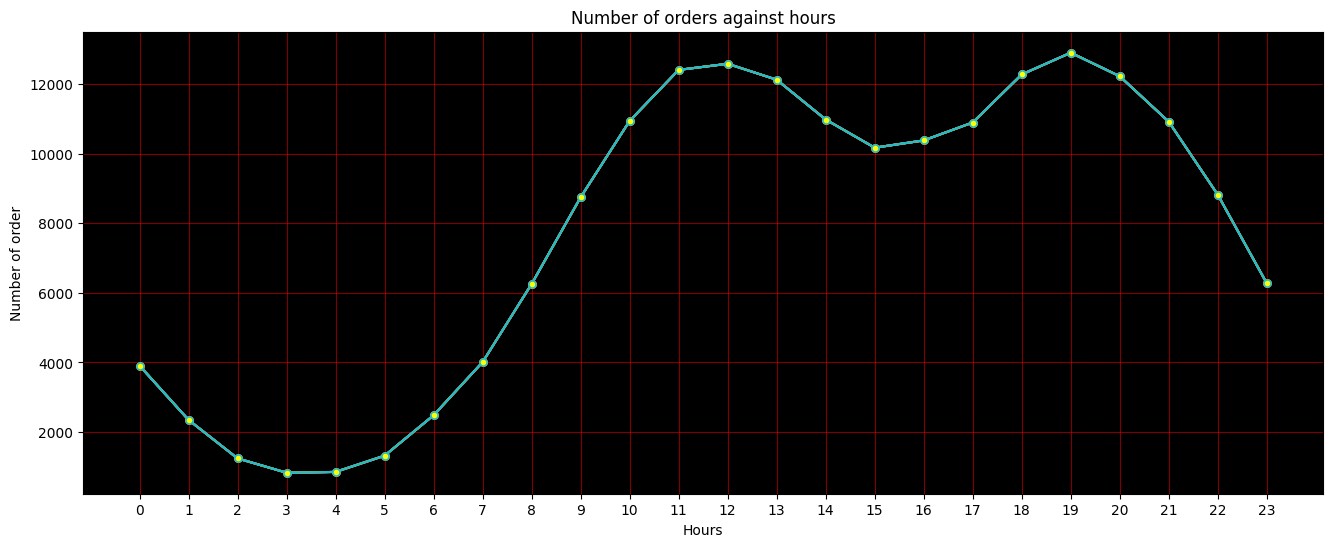

In [52]:
Hours=[hour for hour, df in all_data.groupby('Hours')]
Frequency=all_data.groupby(['Hours']).count()
fig=plt.figure(figsize=(16,6))
plt.axes().set_facecolor("black")
plt.plot(Hours,Frequency,marker='o',markersize='5',markerfacecolor='yellow')
plt.xticks(Hours)
plt.xlabel('Hours')
plt.ylabel('Number of order')
plt.title('Number of orders against hours')
plt.grid(color='red',alpha=0.5)
plt.show()

### Answer: My recommendation is around 11am (11) or 7pm (19)

# Question 4: What product are often sold together?

In [53]:
all_data.head(50)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hours,Minutes
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City (NY),0,1
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City (NY),7,3
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City (NY),18,21
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco (CA),15,13
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta (GA),12,38
5,295670,AA Batteries (4-pack),1,3.84,2019-12-31 22:58:00,"200 Jefferson St, New York City, NY 10001",12,3.84,New York City (NY),22,58
6,295671,USB-C Charging Cable,1,11.95,2019-12-16 15:10:00,"928 12th St, Portland, OR 97035",12,11.95,Portland (OR),15,10
7,295672,USB-C Charging Cable,2,11.95,2019-12-13 09:29:00,"813 Hickory St, Dallas, TX 75001",12,23.90,Dallas (TX),9,29
8,295673,Bose SoundSport Headphones,1,99.99,2019-12-15 23:26:00,"718 Wilson St, Dallas, TX 75001",12,99.99,Dallas (TX),23,26
9,295674,AAA Batteries (4-pack),4,2.99,2019-12-28 11:51:00,"77 7th St, Dallas, TX 75001",12,11.96,Dallas (TX),11,51


#### We create a new dataframe from all_data to group all product that are sold together

In [54]:
grouped_product_data=all_data[all_data['Order ID'].duplicated(keep=False)]
grouped_product_data.head(50)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hours,Minutes
16,295681,Google Phone,1,600.00,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,600.00,Boston (MA),12,37
17,295681,USB-C Charging Cable,1,11.95,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,11.95,Boston (MA),12,37
18,295681,Bose SoundSport Headphones,1,99.99,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,99.99,Boston (MA),12,37
19,295681,Wired Headphones,1,11.99,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,11.99,Boston (MA),12,37
36,295698,Vareebadd Phone,1,400.00,2019-12-13 14:32:00,"175 1st St, New York City, NY 10001",12,400.00,New York City (NY),14,32
37,295698,USB-C Charging Cable,2,11.95,2019-12-13 14:32:00,"175 1st St, New York City, NY 10001",12,23.90,New York City (NY),14,32
42,295703,AA Batteries (4-pack),1,3.84,2019-12-17 12:27:00,"502 Jefferson St, Austin, TX 73301",12,3.84,Austin (TX),12,27
43,295703,Bose SoundSport Headphones,1,99.99,2019-12-17 12:27:00,"502 Jefferson St, Austin, TX 73301",12,99.99,Austin (TX),12,27
66,295726,iPhone,1,700.00,2019-12-25 14:49:00,"203 Lakeview St, Boston, MA 02215",12,700.00,Boston (MA),14,49
67,295726,Lightning Charging Cable,1,14.95,2019-12-25 14:49:00,"203 Lakeview St, Boston, MA 02215",12,14.95,Boston (MA),14,49


#### Creating a new column to grouped the products that are sold together

In [55]:
#grouped_product_data['Products Sold Together']=(grouped_product_data['Product'].groupby(grouped_product_data['Order ID'])).transform(lambda x: ','.join(x))
grouped_product_data['Products Sold Together']=grouped_product_data.groupby('Order ID')['Product'].transform(lambda x: ', '.join(x))
grouped_product_data.head(50)

/var/folders/j1/bmzj2g4s71lfnlwmq7rt69th0000gp/T/ipykernel_9874/819399109.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grouped_product_data['Products Sold Together']=grouped_product_data.groupby('Order ID')['Product'].transform(lambda x: ', '.join(x))


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hours,Minutes,Products Sold Together
16,295681,Google Phone,1,600.00,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,600.00,Boston (MA),12,37,"Google Phone, USB-C Charging Cable, Bose Sound..."
17,295681,USB-C Charging Cable,1,11.95,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,11.95,Boston (MA),12,37,"Google Phone, USB-C Charging Cable, Bose Sound..."
18,295681,Bose SoundSport Headphones,1,99.99,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,99.99,Boston (MA),12,37,"Google Phone, USB-C Charging Cable, Bose Sound..."
19,295681,Wired Headphones,1,11.99,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,11.99,Boston (MA),12,37,"Google Phone, USB-C Charging Cable, Bose Sound..."
36,295698,Vareebadd Phone,1,400.00,2019-12-13 14:32:00,"175 1st St, New York City, NY 10001",12,400.00,New York City (NY),14,32,"Vareebadd Phone, USB-C Charging Cable"
37,295698,USB-C Charging Cable,2,11.95,2019-12-13 14:32:00,"175 1st St, New York City, NY 10001",12,23.90,New York City (NY),14,32,"Vareebadd Phone, USB-C Charging Cable"
42,295703,AA Batteries (4-pack),1,3.84,2019-12-17 12:27:00,"502 Jefferson St, Austin, TX 73301",12,3.84,Austin (TX),12,27,"AA Batteries (4-pack), Bose SoundSport Headphones"
43,295703,Bose SoundSport Headphones,1,99.99,2019-12-17 12:27:00,"502 Jefferson St, Austin, TX 73301",12,99.99,Austin (TX),12,27,"AA Batteries (4-pack), Bose SoundSport Headphones"
66,295726,iPhone,1,700.00,2019-12-25 14:49:00,"203 Lakeview St, Boston, MA 02215",12,700.00,Boston (MA),14,49,"iPhone, Lightning Charging Cable"
67,295726,Lightning Charging Cable,1,14.95,2019-12-25 14:49:00,"203 Lakeview St, Boston, MA 02215",12,14.95,Boston (MA),14,49,"iPhone, Lightning Charging Cable"


#### Drop Duplicated Rows

In [56]:
#grouped_product_data=grouped_product_data.drop_duplicates(['Order ID','Products Sold Together'])
grouped_product_data=grouped_product_data[['Order ID','Products Sold Together']].drop_duplicates()
grouped_product_data.head(50)

,Order ID,Products Sold Together
16,295681,"Google Phone, USB-C Charging Cable, Bose Sound..."
36,295698,"Vareebadd Phone, USB-C Charging Cable"
42,295703,"AA Batteries (4-pack), Bose SoundSport Headphones"
66,295726,"iPhone, Lightning Charging Cable"
76,295735,"iPhone, Apple Airpods Headphones, Wired Headph..."
80,295737,"iPhone, Lightning Charging Cable"
97,295753,"34in Ultrawide Monitor, Lightning Charging Cable"
104,295759,"Bose SoundSport Headphones, Wired Headphones"
129,295783,"Vareebadd Phone, USB-C Charging Cable"
133,295786,"USB-C Charging Cable, Apple Airpods Headphones"


#### To check the Count of sold product together

In [57]:
from itertools import combinations
from collections import Counter
count=Counter()
for row in grouped_product_data['Products Sold Together']:
    row_list=row.split(',')
    count.update(Counter(combinations(row_list,2)))

for key,value in count.most_common(20):
    print(key, value)



('iPhone', ' Lightning Charging Cable') 1005
('Google Phone', ' USB-C Charging Cable') 987
('iPhone', ' Wired Headphones') 447
('Google Phone', ' Wired Headphones') 414
('Vareebadd Phone', ' USB-C Charging Cable') 361
('iPhone', ' Apple Airpods Headphones') 360
('Google Phone', ' Bose SoundSport Headphones') 220
('Vareebadd Phone', ' Wired Headphones') 143
(' USB-C Charging Cable', ' Wired Headphones') 120
('Vareebadd Phone', ' Bose SoundSport Headphones') 80
(' Lightning Charging Cable', ' Wired Headphones') 62
('Lightning Charging Cable', ' USB-C Charging Cable') 55
('Lightning Charging Cable', ' AA Batteries (4-pack)') 52
(' USB-C Charging Cable', ' Bose SoundSport Headphones') 51
('AA Batteries (4-pack)', ' Lightning Charging Cable') 51
('Lightning Charging Cable', ' Lightning Charging Cable') 51
('AAA Batteries (4-pack)', ' USB-C Charging Cable') 50
('AA Batteries (4-pack)', ' AAA Batteries (4-pack)') 48
('AAA Batteries (4-pack)', ' AAA Batteries (4-pack)') 48
(' Lightning Chargin

### Answer: The most sold together products are iPhone and Lightning Charging Cable.

# Question 5: What product sold the most? Why do you think it sold the most?

In [58]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hours,Minutes
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City (NY),0,1
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City (NY),7,3
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City (NY),18,21
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco (CA),15,13
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta (GA),12,38


In [59]:
product_data=all_data.groupby('Product')
product_data.head(20)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hours,Minutes
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City (NY),0,1
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City (NY),7,3
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City (NY),18,21
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco (CA),15,13
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta (GA),12,38
...,...,...,...,...,...,...,...,...,...,...,...
5280,300686,LG Dryer,1,600.00,2019-12-30 13:31:00,"420 10th St, Dallas, TX 75001",12,600.00,Dallas (TX),13,31
5288,300694,LG Washing Machine,1,600.00,2019-12-15 02:08:00,"157 14th St, Los Angeles, CA 90001",12,600.00,Los Angeles (CA),2,8
5354,300758,LG Washing Machine,1,600.00,2019-12-22 19:39:00,"287 Cherry St, San Francisco, CA 94016",12,600.00,San Francisco (CA),19,39
6018,301397,LG Washing Machine,1,600.00,2019-12-30 13:57:00,"369 Ridge St, Boston, MA 02215",12,600.00,Boston (MA),13,57


#### Visualizing the product and quantity sold on a bar chat

['20in Monitor', '27in 4K Gaming Monitor', '27in FHD Monitor', '34in Ultrawide Monitor', 'AA Batteries (4-pack)', 'AAA Batteries (4-pack)', 'Apple Airpods Headphones', 'Bose SoundSport Headphones', 'Flatscreen TV', 'Google Phone', 'LG Dryer', 'LG Washing Machine', 'Lightning Charging Cable', 'Macbook Pro Laptop', 'ThinkPad Laptop', 'USB-C Charging Cable', 'Vareebadd Phone', 'Wired Headphones', 'iPhone']
Product
20in Monitor                   4129
27in 4K Gaming Monitor         6244
27in FHD Monitor               7550
34in Ultrawide Monitor         6199
AA Batteries (4-pack)         27635
AAA Batteries (4-pack)        31017
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
Flatscreen TV                  4819
Google Phone                   5532
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      23217
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
USB-C Charging Cable          23975
Vareebadd

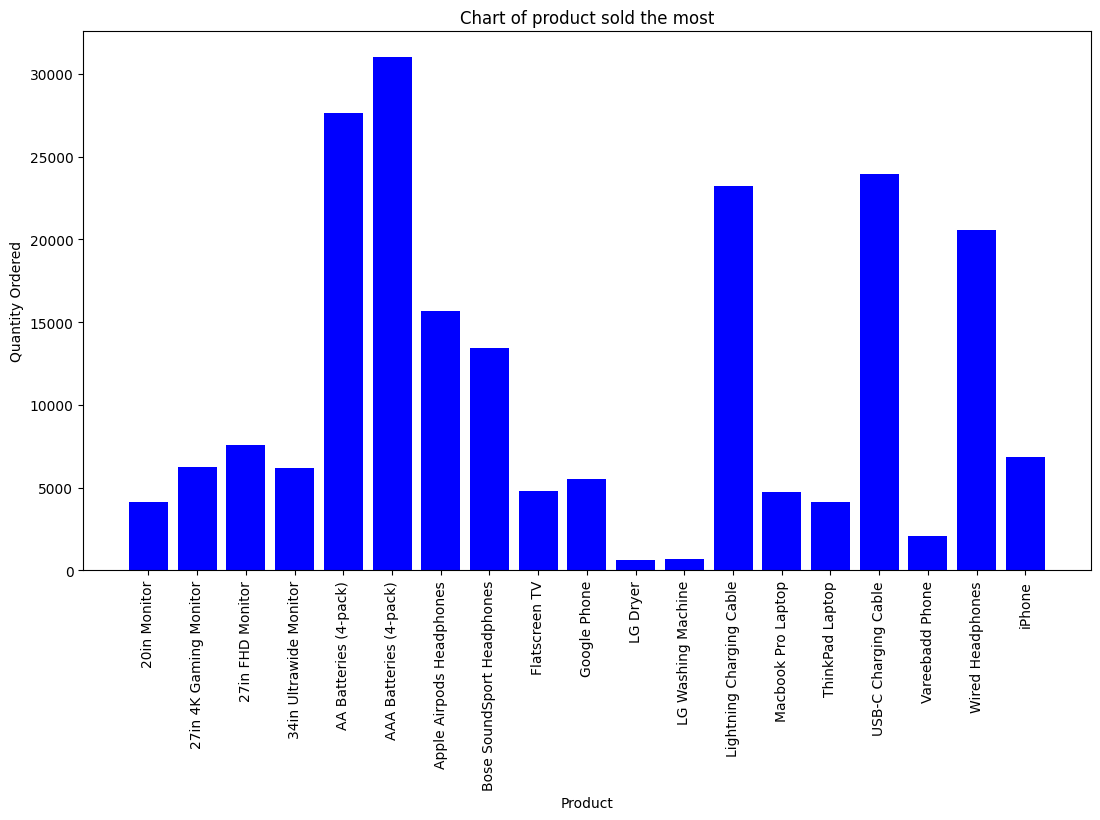

In [60]:
product=[pro for pro, df in product_data]
quantity_ordered=product_data['Quantity Ordered'].sum()
print(product)
print(quantity_ordered)

fig=plt.figure(figsize=(13,7))
plt.bar(product,quantity_ordered, color='b')
plt.xticks(product,rotation='vertical',size=10)
plt.ylabel('Quantity Ordered')
plt.xlabel('Product')
plt.title('Chart of product sold the most')
plt.show()

#### From the above chart, it is visually obvious that the most sold product is AAA Batteries (4-pack).
#### And the big question is, why is it the most sold product?
#### To show why the product is sold the most, we compare the quantity of the sold products with their respective mean prices.

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64


/var/folders/j1/bmzj2g4s71lfnlwmq7rt69th0000gp/T/ipykernel_9874/1088611429.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(product,rotation='vertical',size=10)


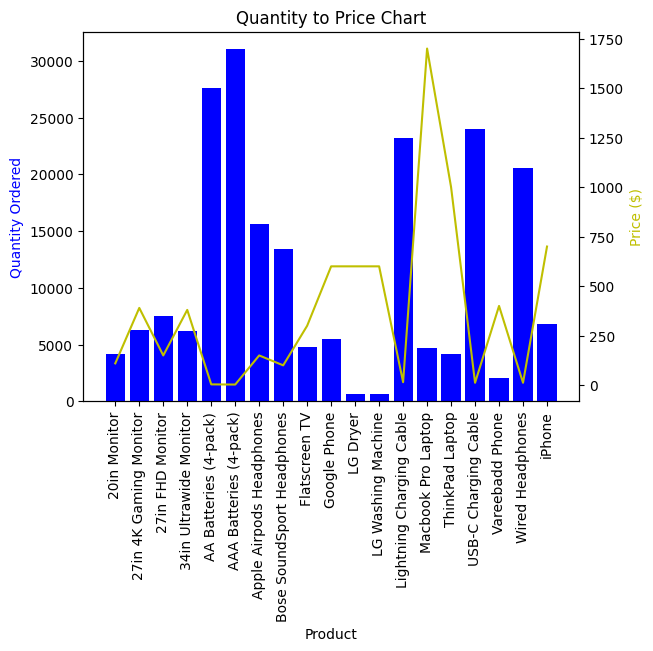

In [61]:
prices=product_data['Price Each'].mean()
print(prices)

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(product,quantity_ordered,color='b')
ax2.plot(product,prices, 'y-')

ax1.set_xlabel('Product')
ax1.set_ylabel('Quantity Ordered', color='b')
ax2.set_ylabel('Price ($)', color='y')
plt.title('Quantity to Price Chart')

ax1.set_xticklabels(product,rotation='vertical',size=10)
plt.show()



#### From the above chat, it implies that the higher the quantity provided the lower the price and vice versa.
#### That is,  the quantity ordered solely depend on the price of the products.

## From the above analysis, it was concluded that:

##### (1) The best month for sales was December, having the highest sale of $461,313. From the analysis above, it is obvious that the
##### Christmas Season being the biggest festive period in USA, influenced the high sales made in December.

##### (2) San (San Francisco) city has the highest number of Sales with a Total sale of $8,211,461.

##### (3) My recommendation is around 11am (11) or 7pm (19)

##### (4) The most sold together products are iPhone and Lightning Charging Cable.

##### (5) The most sold product is AAA Batteries (4-pack). It is the most sold product simply because the price is low.
##### This assumption is proven in 'Quantity to Price Chart'. which diagrammatically states that the higher the quantity sold the lower the price
##### and vive versa.

###### Iwuanyanwu Uchenna Emmanuel_______________________________________________________________________________________________  Thanks